# 数据可视化

In [1]:
import pandas as pd
import numpy as np

## 一、描述性统计分析

In [2]:
#传入需要进行分析的数据
temperature = pd.read_csv("/Users/hardy/Desktop/Python_file/Python_DataAnalyst/Data_Visualize/temperature.csv")
temperature

,姓名,体温
0,Tom,37.8
1,Jerry,36.8
2,Lucy,37.0
3,Emma,37.2
4,John,36.6
5,Alice,37.0
6,Bob,37.0
7,David,36.1
8,Sam,37.5
9,Alex,37.3


### 1.数据集中趋势的指标

#### （1）计算平均数

In [3]:
#计算体温的平均数——mean方法
temperature["体温"].mean()

37.12413793103448

#### （2）计算中位数

In [4]:
#计算体温的中位数——median方法
temperature["体温"].median()

37.0

#### （3）计算众数

In [5]:
#计算体温的中位数——mode方法
temperature["体温"].mode()

0    37.0
Name: 体温, dtype: float64

### 2. 数据离散趋势的指标

#### （1）计算极差

In [6]:
#计算体温的极差
temperature["体温"].max() - temperature["体温"].min()

3.1000000000000014

注：此处出现小数点0.000000000000014是由于浮点数计算误差导致。

In [7]:
#计算体温的极差也可以采用numpy库的array（ptp）方法
np.array(temperature["体温"]).ptp()

3.1000000000000014

#### （2）计算方差/标准差

In [8]:
#计算体温的方差——var方法
temperature["体温"].var()

0.4518965517241382

In [9]:
#计算体温的标准差——std方法
temperature["体温"].std()

0.6722325131412034

#### （3）计算四分位距

In [10]:
#计算体温的四分位距——quantile方法
q1 = temperature["体温"].quantile(0.25)
q3 = temperature["体温"].quantile(0.75)
q3 - q1

0.5

### 3.数据的分布形状

#### 绘制直方图查看数据的分布形状

<Axes: ylabel='Frequency'>

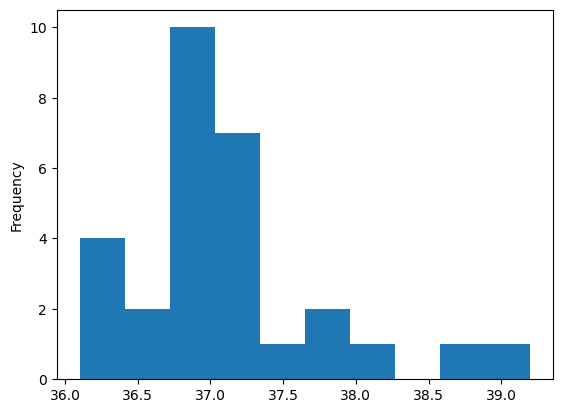

In [11]:
#绘制体温的分布直方图——plot方法
temperature["体温"].plot(kind='hist')

注：此处调用的pandas的plot方法，后面设置kind参数为hist表示直方图（histogram的英文简写）

## 二、数据可视化

### 导入Seaborn & matplotlib 库

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

注意：Matplotlib当前默认的字体并不支持中文展示，所以我们需要把字体换成其它支持中文的字体。
由于每台电脑上有的字体并不系统，可以先查询当前系统所有字体，然后把字体替换成其中某个支持中文的字体。

In [13]:
#查询当前系统所有字体
import matplotlib
from matplotlib.font_manager import FontManager

mpl_fonts = set(f.name for f in FontManager().ttflist)
for f in sorted(mpl_fonts):
    print(f)

.Aqua Kana
.Keyboard
.New York
.SF Arabic
.SF Compact
.SF Compact Rounded
.SF NS Mono
.SF NS Rounded
???????
Academy Engraved LET
Adobe Arabic
Adobe Caslon Pro
Adobe Clean
Adobe Devanagari
Adobe Fan Heiti Std
Adobe Fangsong Std
Adobe Garamond Pro
Adobe Gothic Std
Adobe Hebrew
Adobe Heiti Std
Adobe Kaiti Std
Adobe Ming Std
Adobe Myungjo Std
Adobe Naskh
Adobe Song Std
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Apple Braille
Apple Chancery
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
Baghdad
Bangla MN
Bangla Sangam MN
Baskerville
Beirut
Big Caslon
Birch Std
Blackoak Std
Bodoni 72
Bodoni 72 Oldstyle
Bodoni 72 Smallcaps
Bodoni Ornaments
Bradley Hand
Brush Script MT
Brush Script Std
Chalkboard
Chalkboard SE
Chalkduster
Chaparral Pro
Charlemagne Std
Charter
Cochin
Comic Sans MS
Cooper Std
Copperplate
Corsiva Hebrew
Courier
C

In [14]:
#替换成Heiti TC字体（系统上不一定有这个字体，如果没有的话需要替换成其它的）
matplotlib.rc("font",family='Heiti TC')

### 1. 单个变量数据可视化

In [15]:
#传入企鹅相关信息样本数据（相关可视化的数据）
penguins = pd.read_csv("/Users/hardy/Desktop/Python_file/Python_DataAnalyst/Data_Visualize/penguins.csv")
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


#### （1）绘制直方图（Histogram）

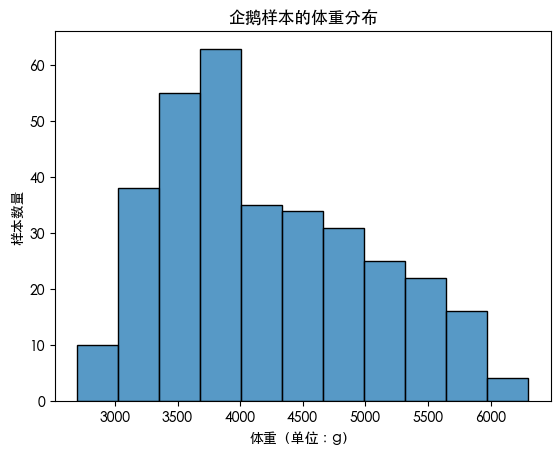

In [16]:
#把penguins的"body_mass_g"列调用Seaborn绘制为直方图
#把图表标题设置为“企鹅样本的体重分布”
#把图表的X轴标签设置为“体重（单位：g）”
#把图表的Y轴标签设置为“样本数量”
sns.histplot(penguins, x="body_mass_g")
plt.title("企鹅样本的体重分布")
plt.xlabel("体重（单位：g）")
plt.ylabel("样本数量")
plt.show()

注：在编辑器中，绘制完图表之后并不会展示出来，还需调用matplotlib中的show函数才能展示出来

       plt.show()
       
    

#### （2）绘制密度图（Kernel Density）

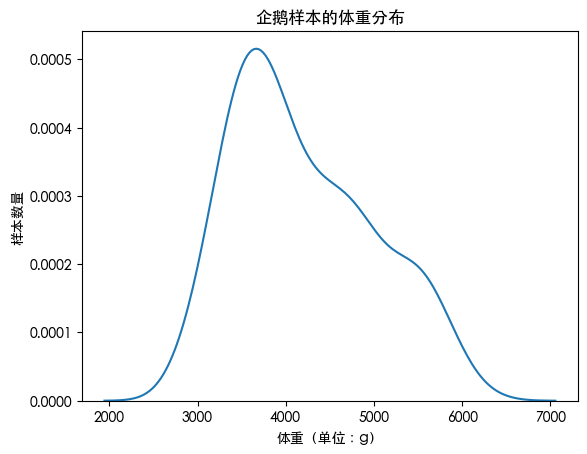

In [17]:
#把penguins的"body_mass_g"列调用Seaborn绘制密度图
#把图表标题设置为“企鹅样本的体重分布”
#把图表的X轴标签设置为“体重（单位：g）”
#把图表的Y轴标签设置为“样本数量”
sns.kdeplot(penguins, x="body_mass_g")
plt.title("企鹅样本的体重分布")
plt.xlabel("体重（单位：g）")
plt.ylabel("样本数量")
plt.show()

#### （3）绘制箱形图（Box Plot）

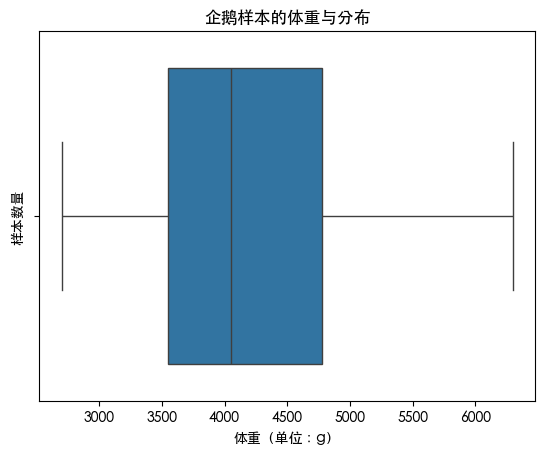

In [18]:
#把penguins的"body_mass_g"列调用Seaborn绘制箱形图
#把图表标题设置为“企鹅样本的体重分布”
#把图表的X轴标签设置为“体重（单位：g）”
#把图表的Y轴标签设置为“样本数量”
sns.boxplot(penguins, x="body_mass_g")
plt.title("企鹅样本的体重与分布")
plt.xlabel("体重（单位：g）")
plt.ylabel("样本数量")
plt.show()

#### （4）小提琴图（Violin Plot）

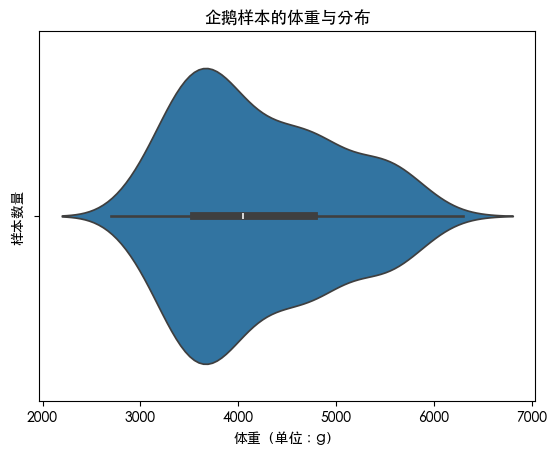

In [19]:
#把penguins的"body_mass_g"列调用Seaborn绘制小提琴图
#把图表标题设置为“企鹅样本的体重分布”
#把图表的X轴标签设置为“体重（单位：g）”
#把图表的Y轴标签设置为“样本数量”
sns.violinplot(penguins, x="body_mass_g")
plt.title("企鹅样本的体重与分布")
plt.xlabel("体重（单位：g）")
plt.ylabel("样本数量")
plt.show()

### 2.两个变量数据可视化

#### （1）散点图（Scatter Plot）

In [20]:
#传入消费账单数据
tips = pd.read_csv("/Users/hardy/Desktop/Python_file/Python_DataAnalyst/Data_Visualize/tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


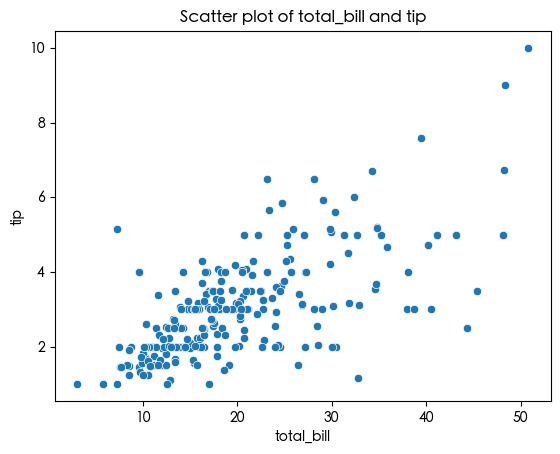

In [21]:
#把tips的total_bill和tip列绘制散点图
sns.scatterplot(tips, x="total_bill", y="tip")
plt.title("Scatter plot of total_bill and tip")
plt.show()

#### （2）折线图（Line Plot）

In [22]:
#传入飞行乘客数量的数据
flights = pd.read_csv("/Users/hardy/Desktop/Python_file/Python_DataAnalyst/Data_Visualize/flights.csv")
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [23]:
#筛选出各年一月份飞行乘客数量的数据flights_jan
flights_jan = flights[flights["month"] == "January"]
flights_jan

,year,month,passengers
0,1949,January,112
12,1950,January,115
24,1951,January,145
36,1952,January,171
48,1953,January,196
60,1954,January,204
72,1955,January,242
84,1956,January,284
96,1957,January,315
108,1958,January,340


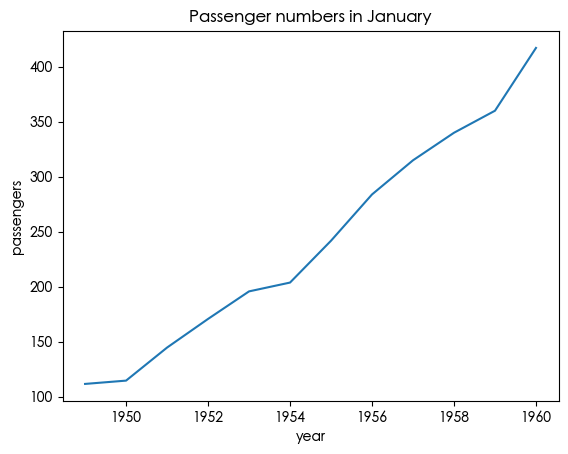

In [24]:
#把flights的year和passengers列绘制折线图
sns.lineplot(flights_jan, x="year", y="passengers")
plt.title("Passenger numbers in January")
plt.show()

#### （3）条形图（Bar Plot）

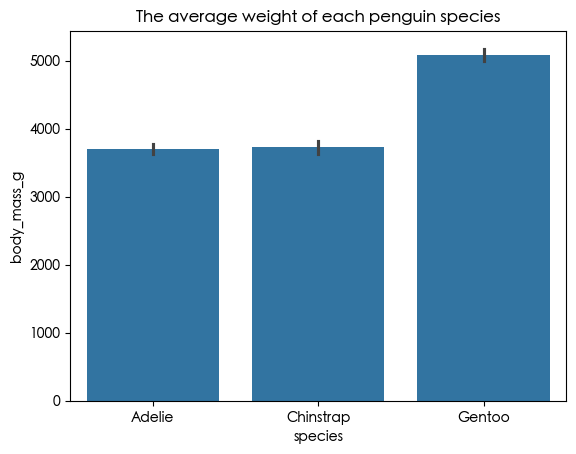

In [25]:
#把penguins按照species绘制body_mass_g平均值的条形图
sns.barplot(penguins, x="species", y="body_mass_g") ##条形图默认计算样本的平均值
plt.title("The average weight of each penguin species")
plt.show()

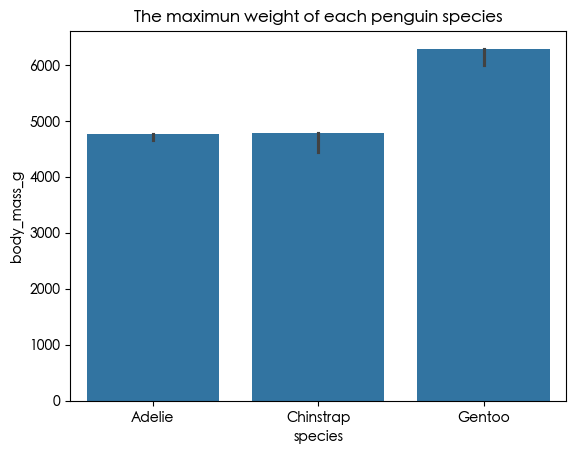

In [26]:
#把penguins按照species绘制body_mass_g最大值的条形图
sns.barplot(penguins, x="species", y="body_mass_g", estimator=np.max) ##插入estimator参数赋值为计算企鹅样本的体重最大值
plt.title("The maximun weight of each penguin species")
plt.show()

#### （4）计数图（Count Plot）

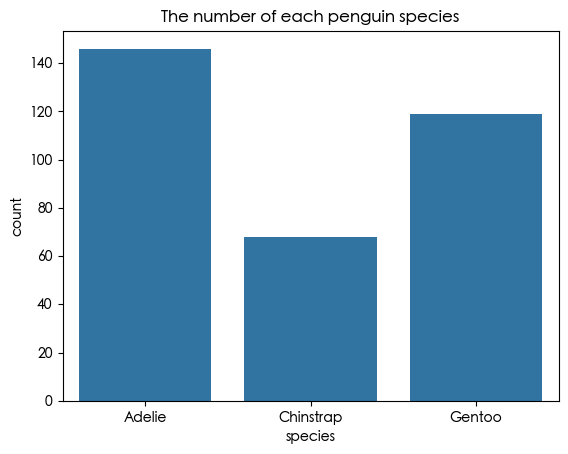

In [27]:
#把penguins按照species数量绘制条形图
sns.countplot(penguins, x="species")
plt.title("The number of each penguin species")
plt.show()

#### （5）饼图（Pie Plot）

In [28]:
#设置示例数据
fruits = pd.DataFrame({'fruit': ['apple', 'orange', 'banana', 'pear'],
                     'vote': [32, 22, 19, 7]})
fruits

,fruit,vote
0,apple,32
1,orange,22
2,banana,19
3,pear,7


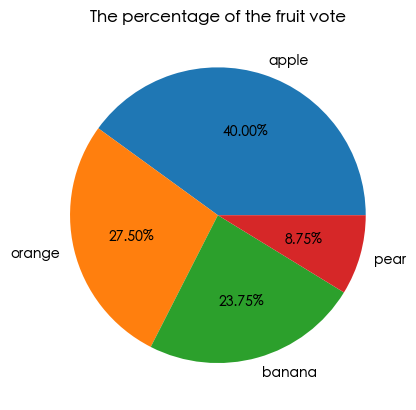

In [29]:
#把fruits中各个fruit的vote比例绘制成饼图
plt.pie(fruits["vote"], labels=fruits["fruit"], autopct="%.2f%%") ##Seaborn中没有直接绘制饼图的方法
plt.title("The percentage of the fruit vote")
plt.show()

### 3.多个变量数据可视化

#### （1）散点图——引入颜色和大小表示新变量

In [30]:
#传入鸢尾花属性的相关数据
iris = pd.read_csv("/Users/hardy/Desktop/Python_file/Python_DataAnalyst/Data_Visualize/iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


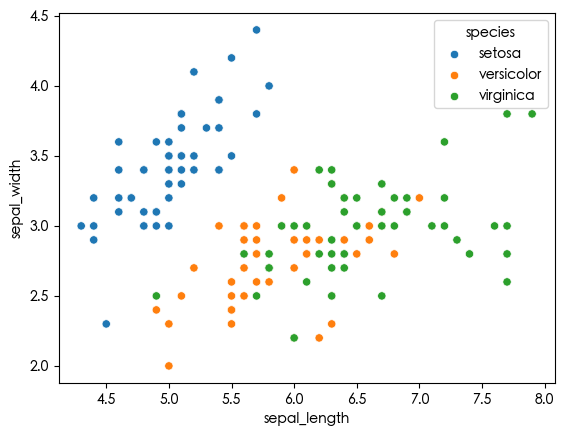

In [31]:
#探索iris不同种类鸢尾花萼片长度和宽度之间的关系的散点图
#长度和宽度绘制成散点图，颜色表示种类
sns.scatterplot(iris, x="sepal_length", y="sepal_width", hue="species")
plt.show()

注：引入hue参数对不同分类变量进行区分，散点图就会把不同变量绘制成不同的颜色。

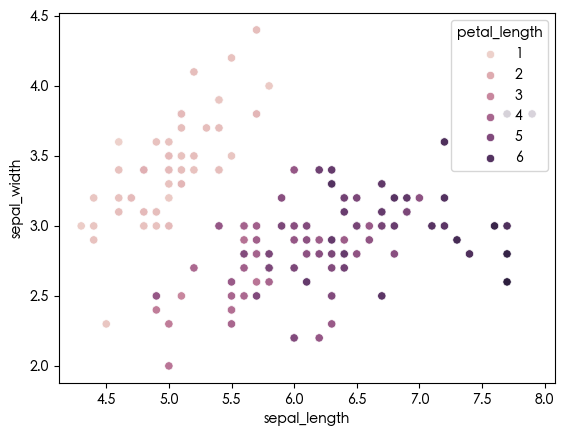

In [32]:
#探索iris不同花瓣长度的鸢尾花萼片长度和宽度之间的关系的散点图
#长度和宽度绘制成散点图，颜色表示花瓣长度
sns.scatterplot(iris, x="sepal_length", y="sepal_width", hue="petal_length")
plt.show()

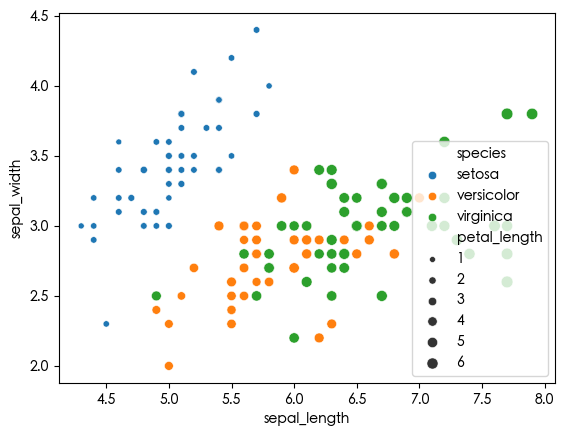

In [33]:
#探索iris不同种类的鸢尾花在不同的花瓣长度下，萼片长度和宽度之间的关系的散点图
#长度和宽度绘制成散点图，颜色表示种类，大小表示花瓣长度
sns.scatterplot(iris, x="sepal_length", y="sepal_width", hue="species", size="petal_length")
plt.show()

#### （2）折线图/条形图——引入多条折线/形状表示新变量

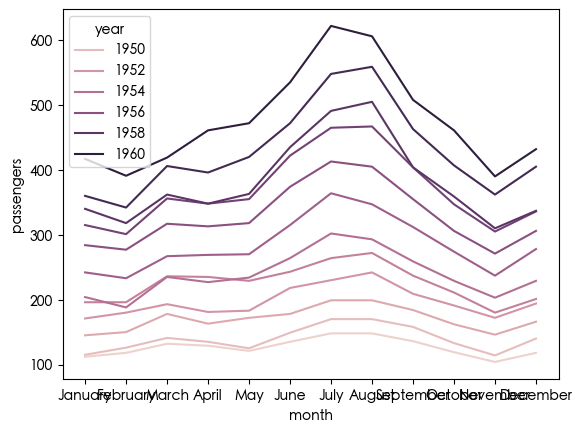

In [34]:
#绘制多个年份各月份和passengers列的折线图
#横轴表示月份，纵轴表示乘客数量，不同颜色的折线表示不同年份
sns.lineplot(flights, x="month", y="passengers", hue="year")
plt.show()

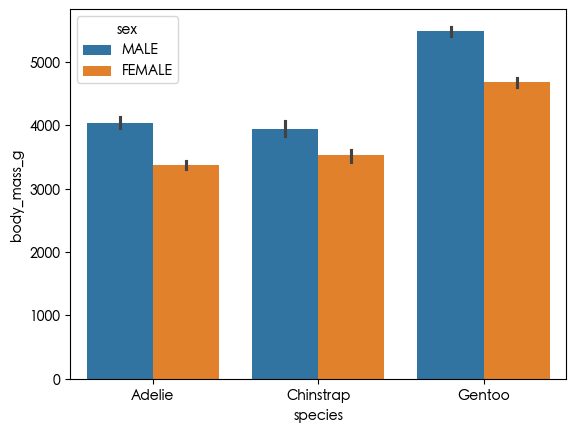

In [35]:
#绘制不同种类企鹅在不同性别下平均体重的条形图
#横轴表示不同类型的企鹅，纵轴表示平均体重，不同颜色的形状表示性别
sns.barplot(penguins, x="species", y="body_mass_g", hue="sex") 
plt.show()

#### （3）热力图（Heat Map）

In [36]:
#传入不同模型在通用语言理解测评任务上的得的数据
glue = sns.load_dataset("glue").pivot(index='Model', columns='Task', values='Score')
glue

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


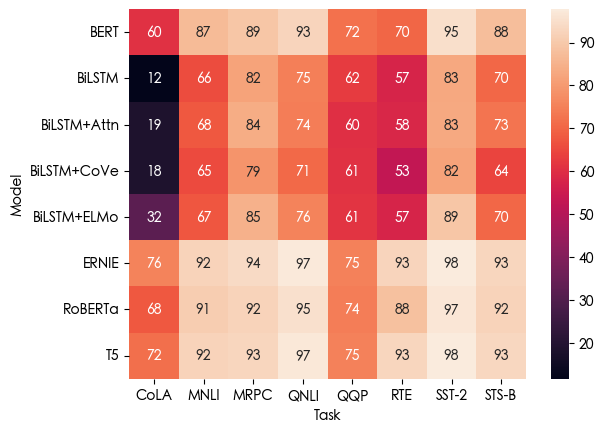

In [37]:
#绘制不同模型在通用语言理解测评任务上的得分的热力图
sns.heatmap(glue, annot=True)
plt.show()

#### （4）重叠图表

In [38]:
#对所需数据进行赋值
setosa = iris.query('species == "setosa"')
versicolor = iris.query('species == "versicolor"')
virginica = iris.query('species == "virginica"')

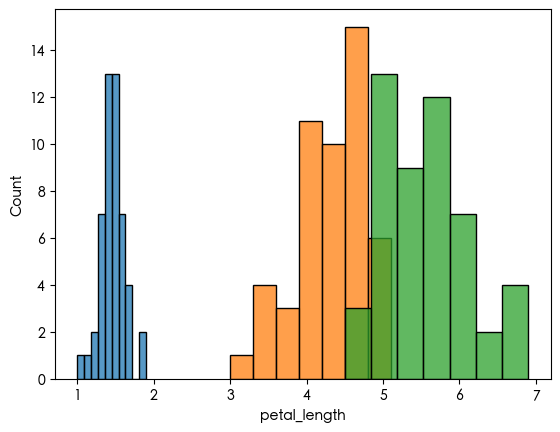

In [39]:
#在同一张图上对setosa、versicolor、virginica的petal_length变量绘制直方图
sns.histplot(setosa['petal_length'])
sns.histplot(versicolor['petal_length'])
sns.histplot(virginica['petal_length'])
plt.show()

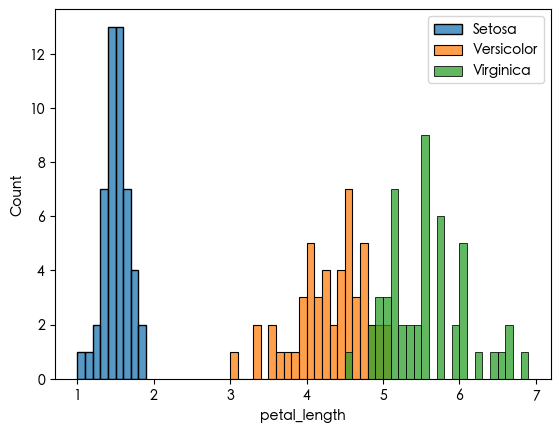

In [52]:
# 在同一张图上对setosa、versicolor、virginica的petal_length变量绘制直方图，条柱宽度为0.1
# 在图上给三个直方图添加标签，分别为“Setosa”、“Versicolor”、“Virginica”，并展示图例
sns.histplot(setosa['petal_length'], binwidth=0.1, label="Setosa")
sns.histplot(versicolor['petal_length'], binwidth=0.1, label="Versicolor")
sns.histplot(virginica['petal_length'], binwidth=0.1, label="Virginica")
plt.legend() 
plt.show()

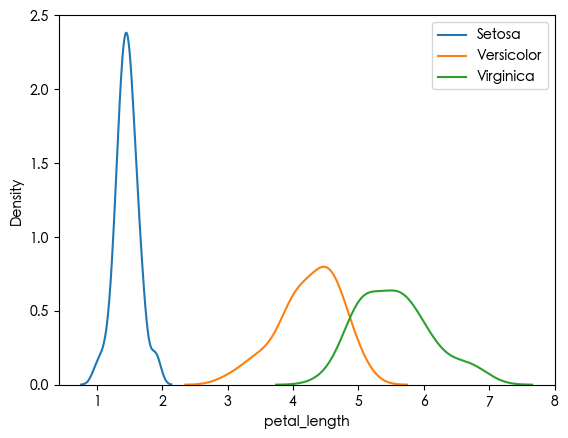

In [53]:
# 在同一张图上对setosa、versicolor、virginica的petal_length变量绘制密度图，条柱宽度为0.1
# 在图上给三个密度图添加标签，分别为“Setosa”、“Versicolor”、“Virginica”，并展示图例
sns.kdeplot(setosa['petal_length'], label="Setosa")
sns.kdeplot(versicolor['petal_length'], label="Versicolor")
sns.kdeplot(virginica['petal_length'], label="Virginica")
plt.legend() 
plt.show()

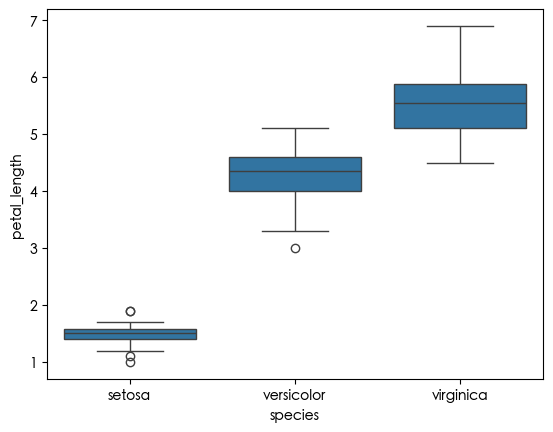

In [54]:
# 传入iris作为数据，以species为横轴数据，petal_length为纵轴数据，绘制箱型图
sns.boxplot(iris, y="petal_length", x="species")
plt.show()

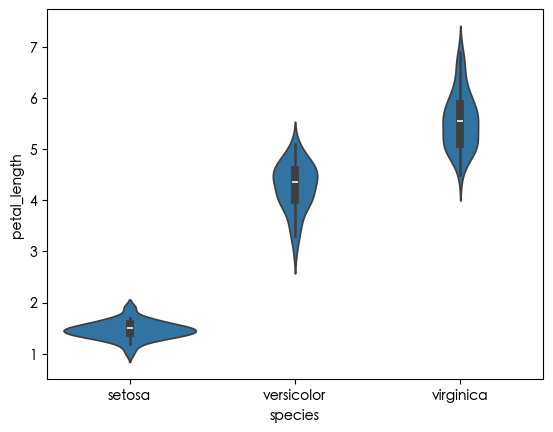

In [55]:
# 传入iris作为数据，以species为横轴数据，petal_length为纵轴数据，绘制小提琴图
sns.violinplot(iris, y="petal_length", x="species")
plt.show()

### 4.配对图的绘制（Pair Plot）

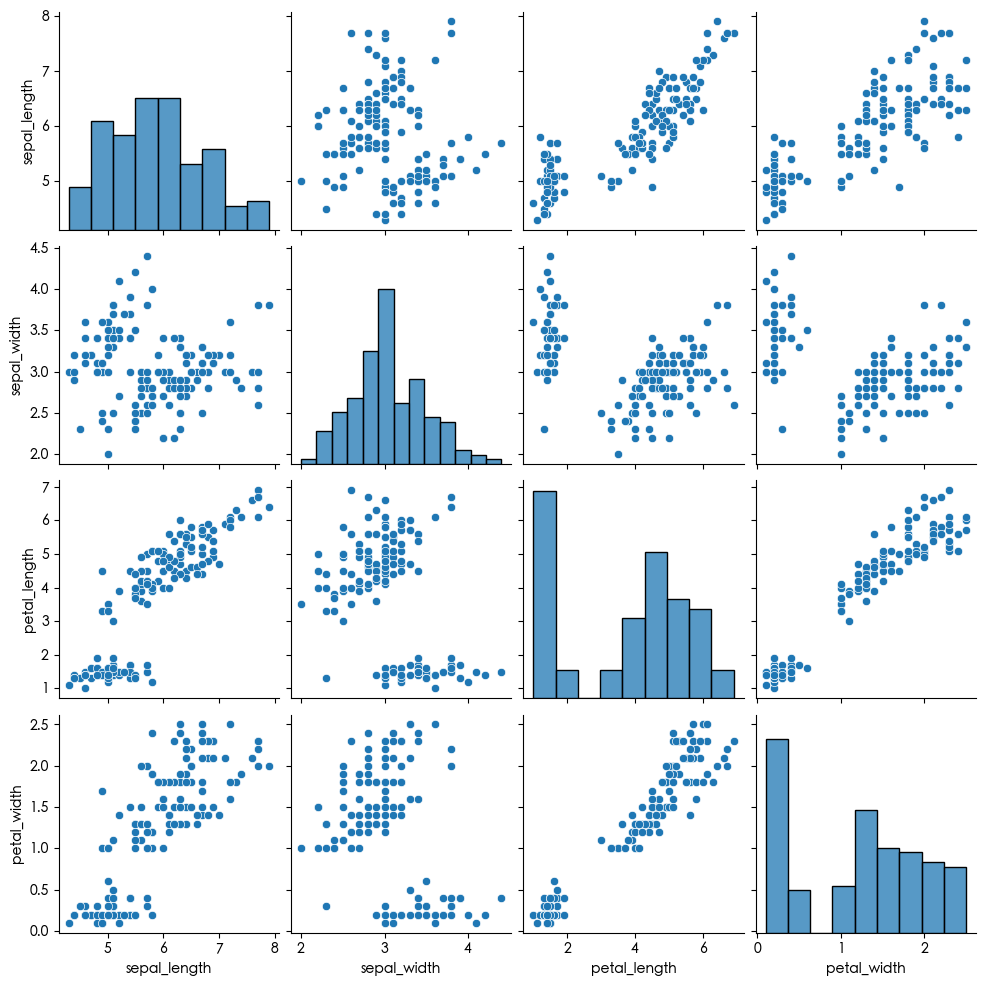

In [61]:
# 传入iris作为数据，绘制成对图（Pair Plot）
sns.pairplot(iris)
plt.show()

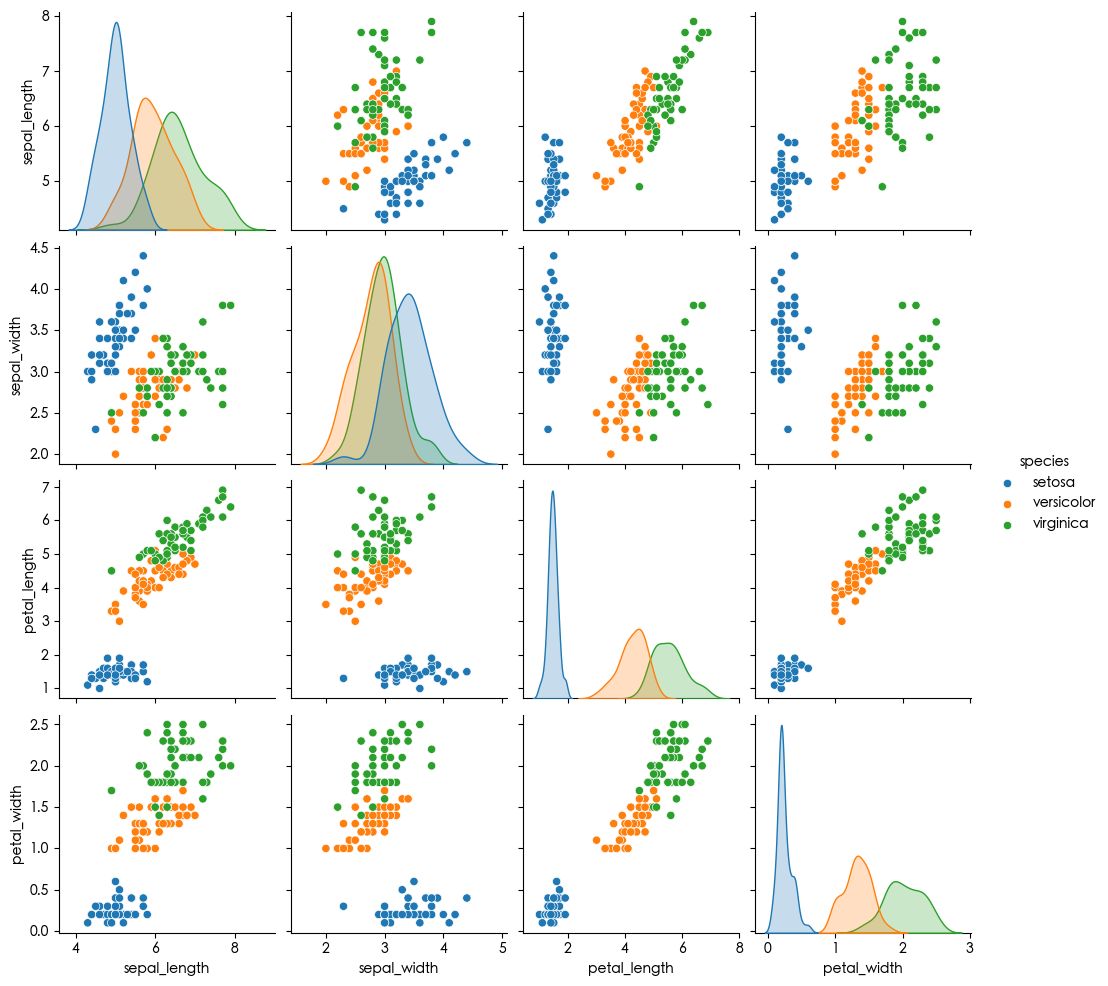

In [62]:
# 传入iris作为数据，以species进行颜色分类，绘制成对图（Pair Plot）
sns.pairplot(iris, hue="species")
plt.show()

## 补充：matplotlib的其他相关操作

### 1. 给图表换颜色

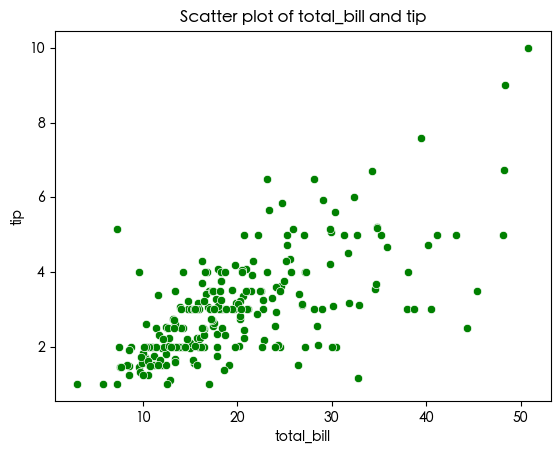

In [41]:
#把tips的total_bill和tip列绘制的散点图变成绿色
sns.scatterplot(tips, x="total_bill", y="tip", color="green")  ##设置color参数即可改变颜色
plt.title("Scatter plot of total_bill and tip")
plt.show()

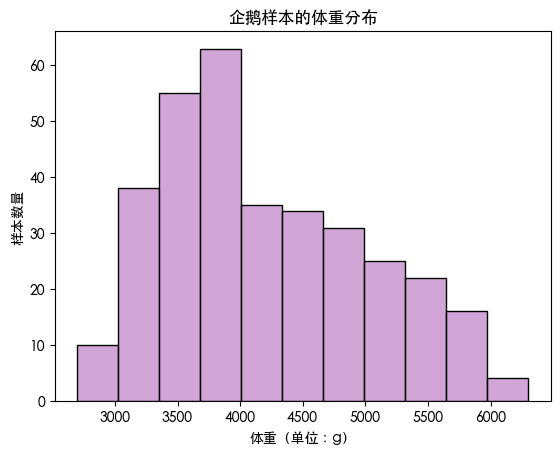

In [42]:
#把penguins的"body_mass_g"列绘制的直方图变成浅紫色
sns.histplot(penguins, x="body_mass_g", color="#c287c7")  ## "#c287c7"为表示颜色的十六进制
plt.title("企鹅样本的体重分布")
plt.xlabel("体重（单位：g）")
plt.ylabel("样本数量")
plt.show()

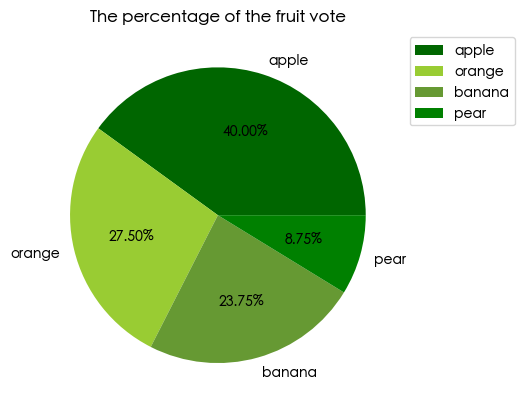

In [43]:
#把fruits中各个fruit的vote比例绘制成的饼图更换颜色
plt.pie(fruits["vote"], labels=fruits["fruit"], autopct="%.2f%%", colors=['#006600', '#99cc33', '#669933', '#008000', '#0000ff']) ##Seaborn中没有直接绘制饼图的方法
plt.title("The percentage of the fruit vote")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### 2.设置图例及其位置

引入legend函数（图例函数）：

     plt.legend(["图例的相关文字"])
     plt.legend(bbox_to_anchor=(a, b))
       
     bbox_to_anchor参数会把图例放到图表外，设定的元组(a, b)中，
       
     a表示横向位置，0表示图例会在图表左边，1表示图例会在图表右边；
     b表示纵向位置，0表示图例顶部和图表下边框对齐，1表示图例顶部和图表上边框对齐。

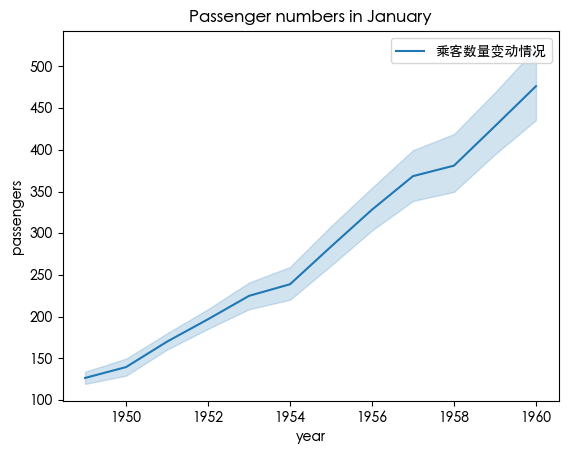

In [46]:
#给flights绘制的折线图增加图例
sns.lineplot(flights, x="year", y="passengers")
plt.title("Passenger numbers in January")
plt.legend(["乘客数量变动情况"])
plt.show()

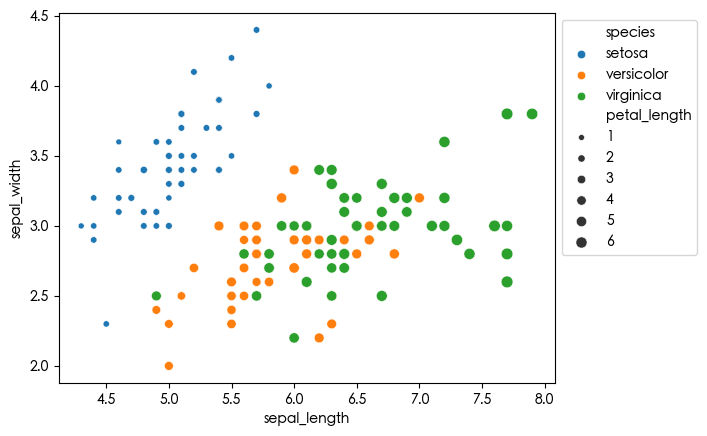

In [47]:
#绘制气泡图（图例在右上方）
sns.scatterplot(iris, x="sepal_length", y="sepal_width", hue="species", size="petal_length")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

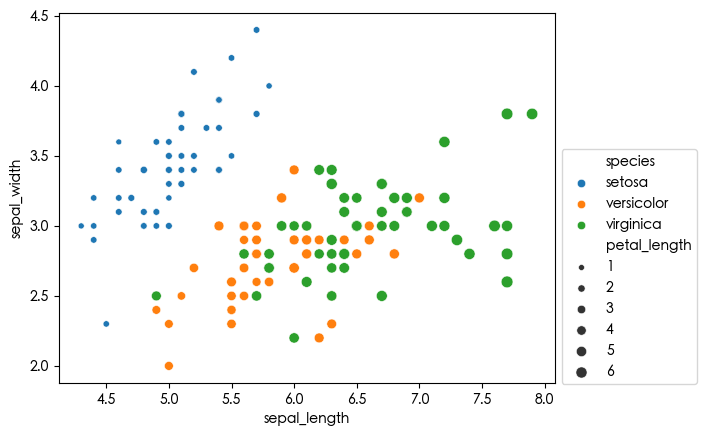

In [50]:
#绘制气泡图（图例在右下方）
#bbox_to_anchor=(1, 1)表示图例位置，可以根据实际情况微调
sns.scatterplot(iris, x="sepal_length", y="sepal_width", hue="species", size="petal_length")
plt.legend(bbox_to_anchor=(1, 0.65))
plt.show()

### 3.并排放置多图

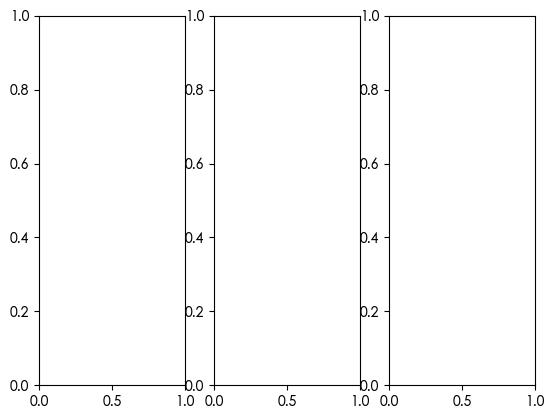

In [59]:
# 绘制一个一行三列的空白子图
plt.subplots(1, 3)
plt.show()

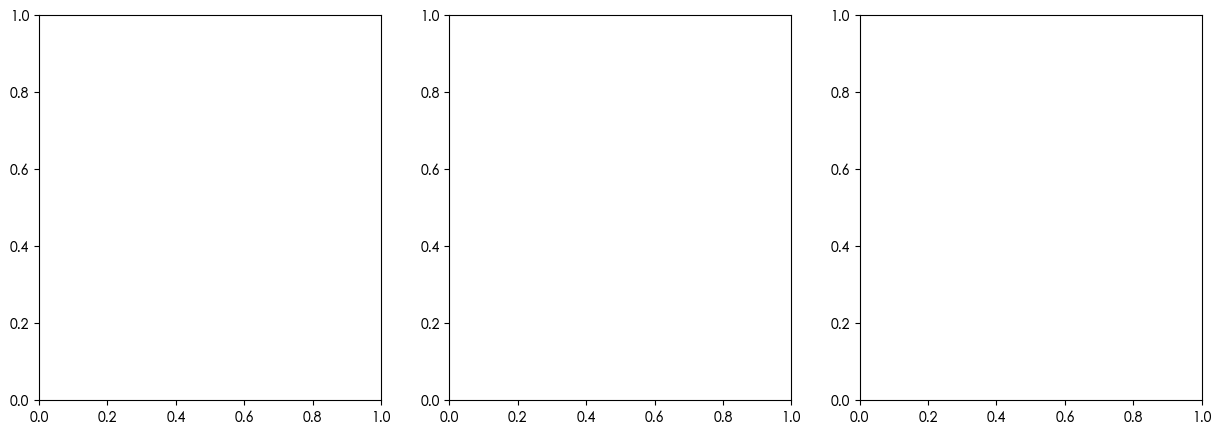

In [57]:
# 绘制一个一行三列的空白子图，子图尺寸为(15 ,5)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.show()

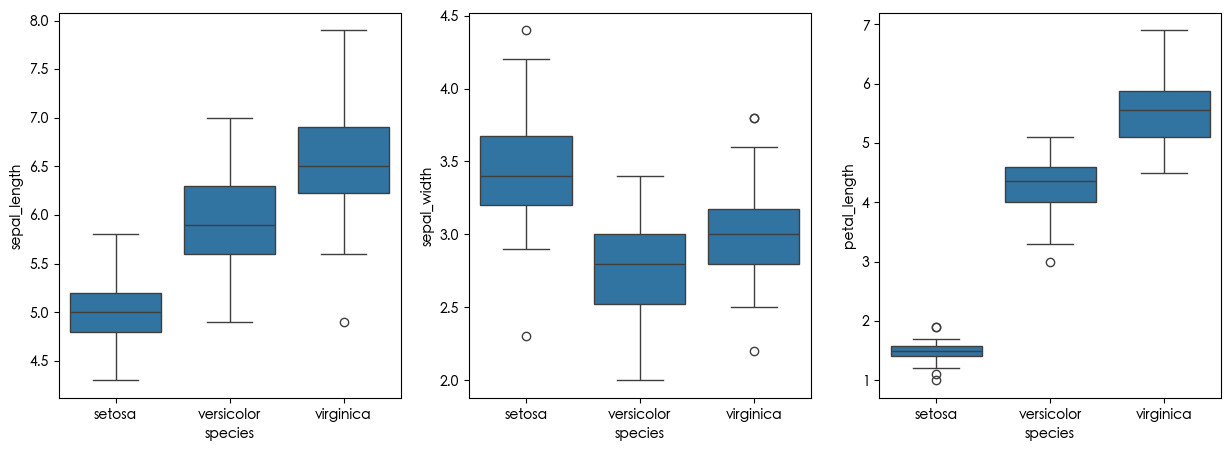

In [60]:
# 绘制一个一行三列的子图，子图尺寸为(15 ,5)
# 每个子图里传入iris作为数据，species为横轴变量，纵轴变量在每个子图里分别为sepal_length、sepal_width、petal_length，绘制箱型图
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=iris, x="species", y="sepal_length", ax=axes[0])
sns.boxplot(data=iris, x="species", y="sepal_width", ax=axes[1])
sns.boxplot(data=iris, x="species", y="petal_length", ax=axes[2])
plt.show()